In [3]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from generate_3d_sample_clean import generate_3d_sample

output_dir = "output_HJ"
device = torch.device(f"cuda:0")
model_path = os.path.join(output_dir, 'trained_model_3d.pth')

saved_data = torch.load(model_path, map_location=device)
trained_generators_state_dicts = saved_data['generators_state_dicts']
fixed_noise_maps = saved_data['fixed_noise_maps']
pyramid_shapes = saved_data['pyramid_shapes']
train_opt_dict = saved_data['opt']
pyramid = saved_data['pyramid']

# Create dummy pyramid for shape info if needed, or use saved shapes
# This part might need refinement depending on how gen_size interacts
class DummyOpt: pass
train_opt = DummyOpt()
for k, v in train_opt_dict.items(): 
    setattr(train_opt, k, v)
train_opt.nc_im = 1 # Assume single channel if not saved explicitly


C:\Users\DELL\AppData\Local\Temp\ipykernel_16928\2713280240.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_data = torch.load(model_path, map_location=device)


In [9]:
for i, p in enumerate(pyramid[::-1]):
    if i == 0:
        print(f'scale of {i} - the finest')    
    elif i == len(pyramid)-1:
        print(f'scale of {i} - the coarsest')
    else:
        print(f'scale of {i}')
    print(p.shape)
    print('')

scale of 0 - the finest
torch.Size([1, 1, 16, 32, 32])

scale of 1
torch.Size([1, 1, 12, 24, 24])

scale of 2
torch.Size([1, 1, 9, 18, 18])

scale of 3
torch.Size([1, 1, 7, 14, 14])

scale of 4 - the coarsest
torch.Size([1, 1, 6, 11, 11])



In [42]:
training_data = pyramid[-1].detach().cpu().numpy()

In [ ]:
REAL_1 = [] 
for i in range(100):
    dummy = generate_3d_sample(trained_generators_state_dicts,
                                pyramid, # Pass dummy pyramid for shape reference
                                train_opt, # Use options from training
                                device,
                                starting_scale=0,
                                evaluation_mode=True).detach().cpu().numpy()
    REAL_1.append(dummy)
REAL_1 = np.array(REAL_1).squeeze()

In [72]:
REAL_1_mean = [] 
for real in REAL_1:
    REAL_1_mean.append(real.mean())
REAL_1_mean = np.array(REAL_1_mean)
REAL_1_mean.shape

(100,)

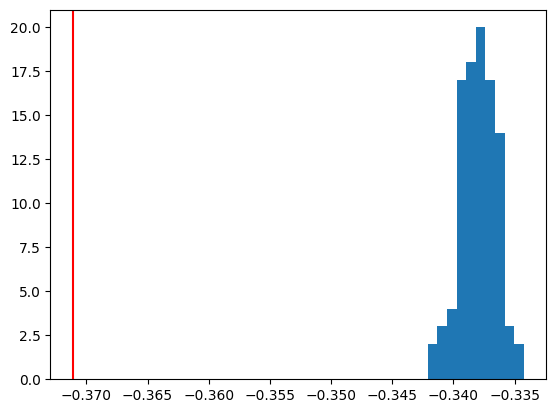

In [73]:
plt.hist(REAL_1_mean)
plt.axvline(x = training_data.mean(), color = 'r')

Text(0.5, 1.0, 'Mean')

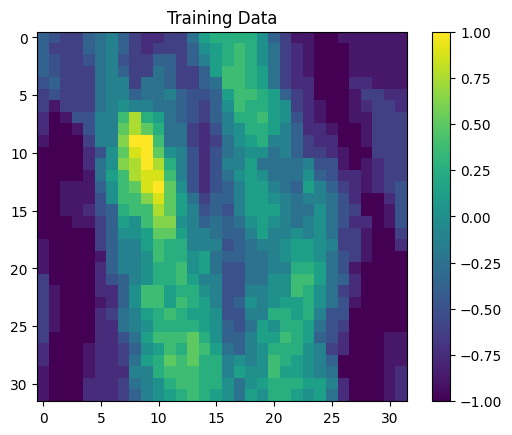

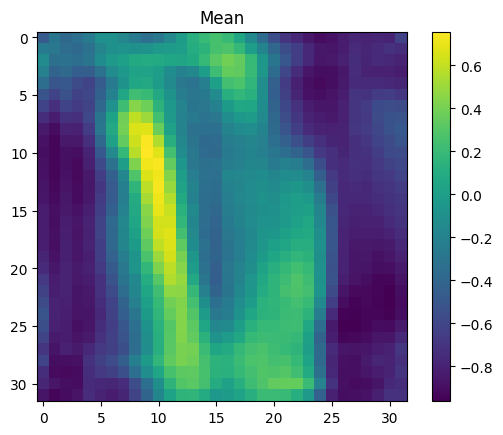

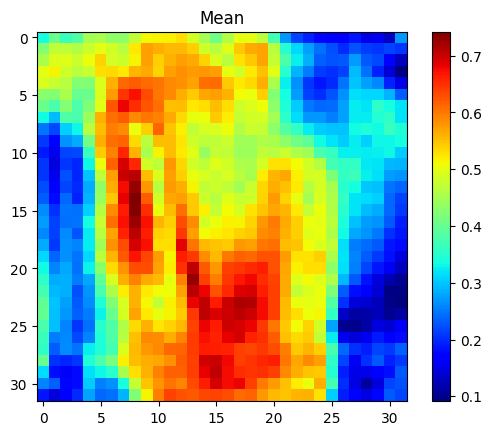

In [77]:
training_data = pyramid[-1].detach().cpu().numpy()
training_data.shape
plt.figure()
plt.imshow(training_data.squeeze().mean(0))
plt.colorbar()
plt.title('Training Data')

plt.figure()
plt.imshow(REAL_1.mean(0).mean(0))
plt.colorbar()
plt.title('Mean')

plt.figure()
plt.imshow(REAL_1.std(0).mean(0), 'jet')
plt.colorbar()
plt.title('Mean')

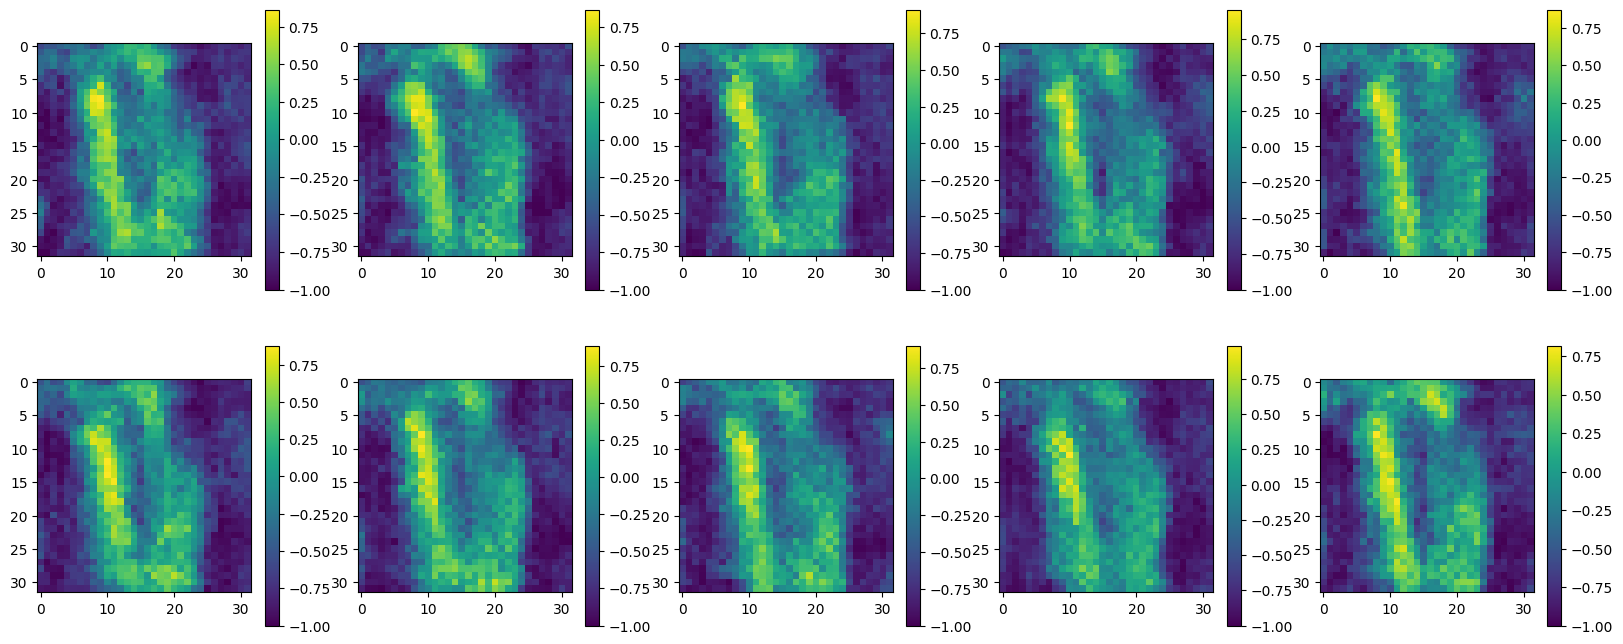

In [75]:
img_width = 4
img_height = 4
num_of_image_in_a_row = 5
len_images = 10
for i in range(len_images):
    if i == 0:
        plt.figure(figsize = (img_width*num_of_image_in_a_row,img_height*len_images//num_of_image_in_a_row))
    plt.subplot(len_images//num_of_image_in_a_row, num_of_image_in_a_row,i+1)
    plt.imshow(REAL_1[i].mean(0))
    plt.colorbar()

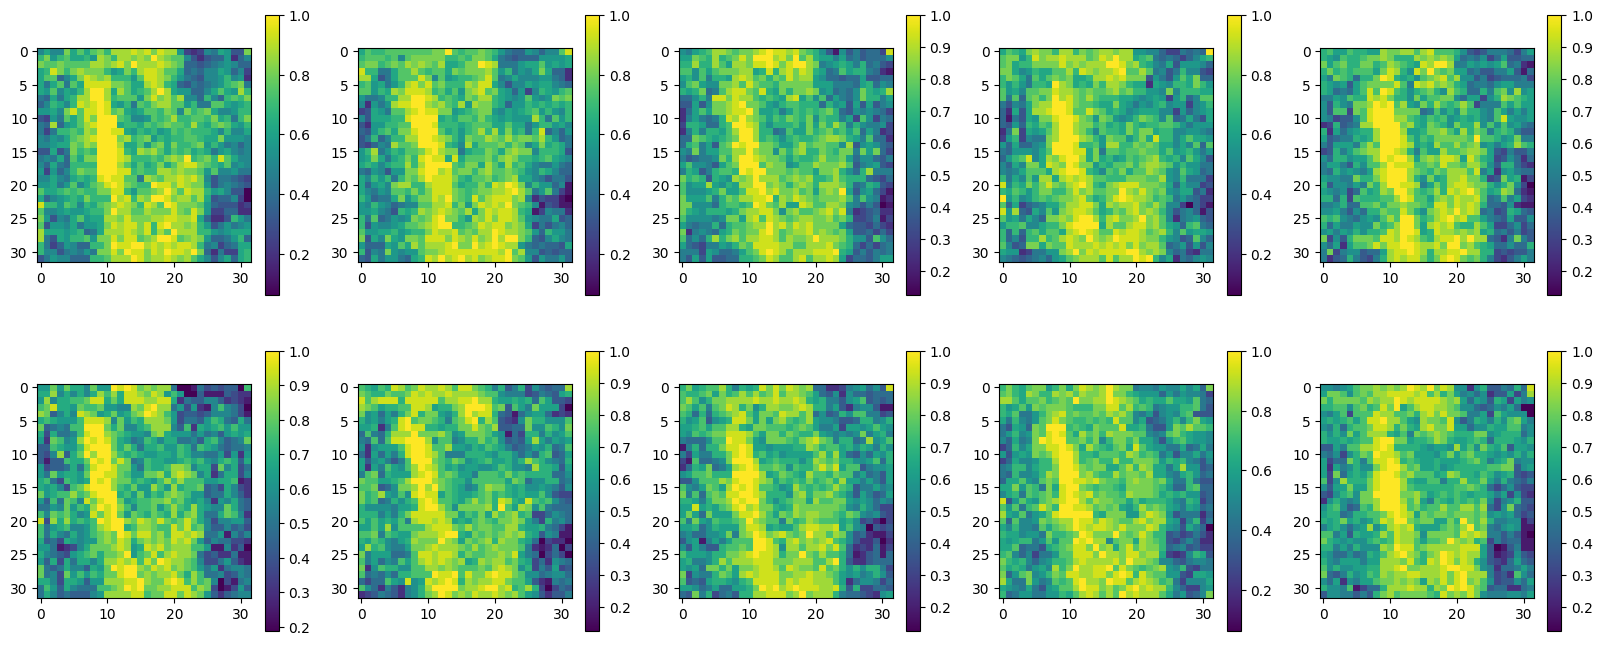

In [62]:
img_width = 4
img_height = 4
num_of_image_in_a_row = 5
len_images = 10
for i in range(len_images):
    if i == 0:
        plt.figure(figsize = (img_width*num_of_image_in_a_row,img_height*len_images//num_of_image_in_a_row))
    plt.subplot(len_images//num_of_image_in_a_row, num_of_image_in_a_row,i+1)
    plt.imshow(REAL_1[i].mean(0))
    plt.colorbar()

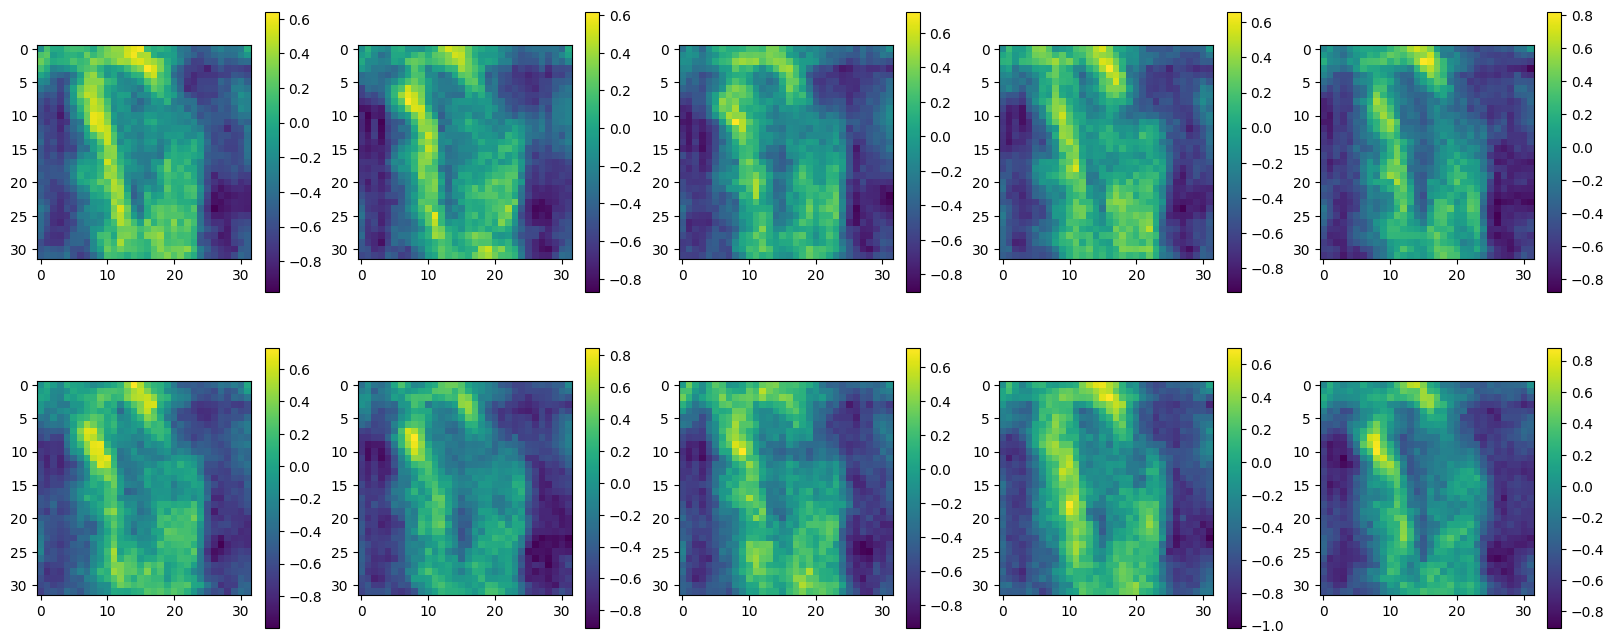

In [17]:
img_width = 4
img_height = 4
num_of_image_in_a_row = 5
len_images = 10
for i in range(len_images):
    if i == 0:
        plt.figure(figsize = (img_width*num_of_image_in_a_row,img_height*len_images//num_of_image_in_a_row))
    plt.subplot(len_images//num_of_image_in_a_row, num_of_image_in_a_row,i+1)
    plt.imshow(REAL_1[i].mean(0))
    plt.colorbar()

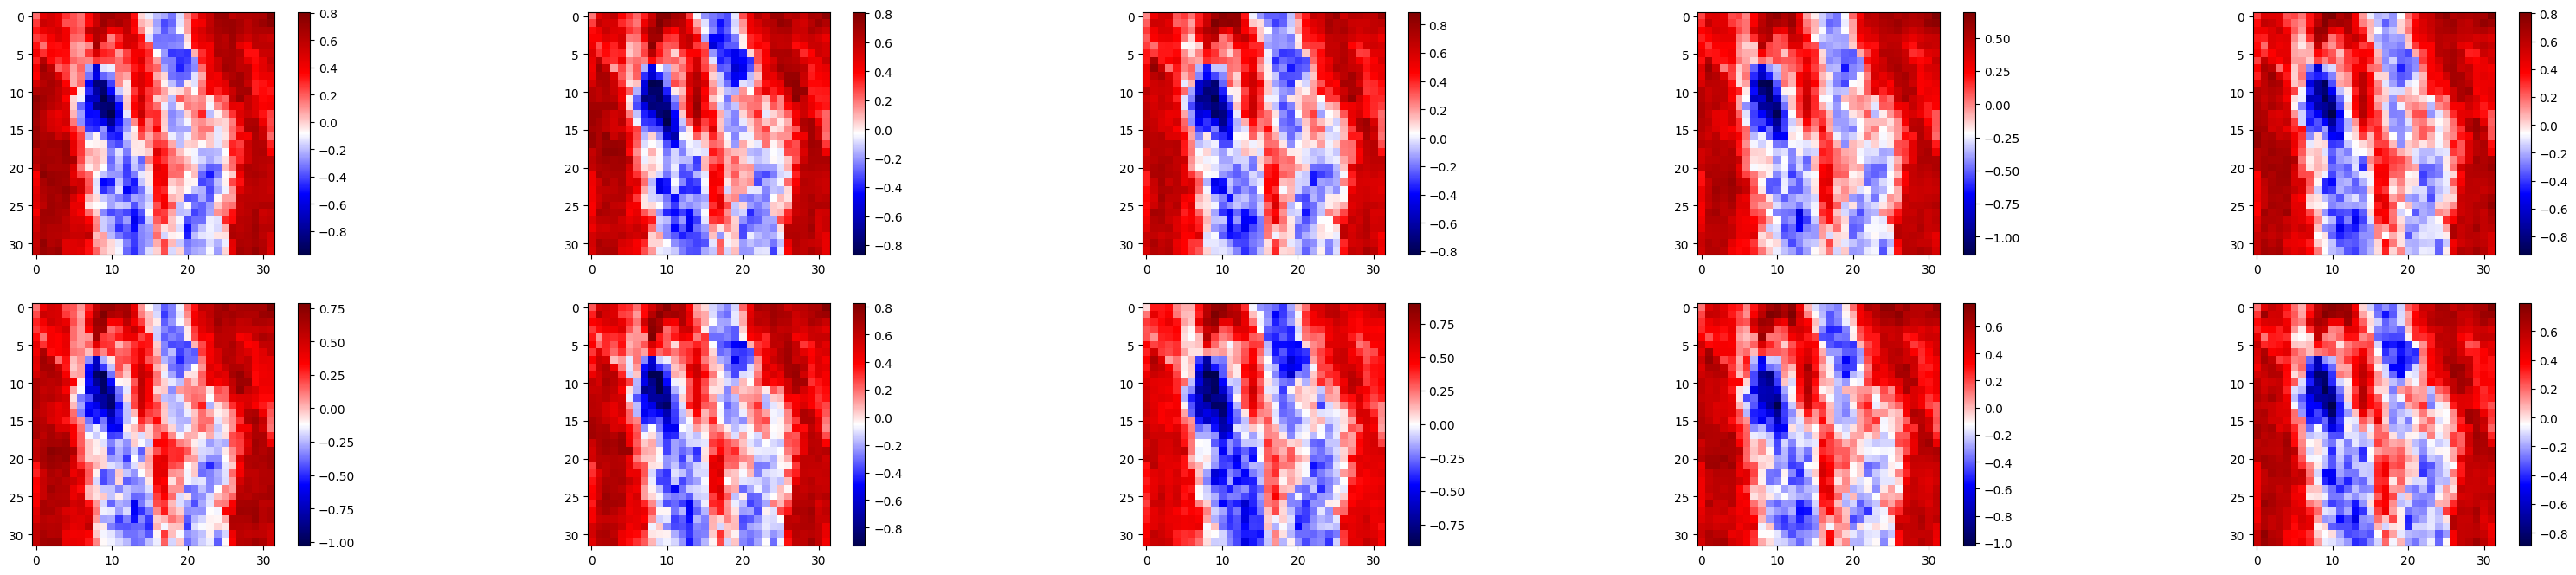

In [74]:
img_width = 4
img_height = 4
num_of_image_in_a_row = 5

for i in range(len(REAL_1)):
    if i == 0:
        plt.figure(figsize = (img_width*len(REAL_1),img_height*len(REAL_1)//5))
    plt.subplot(len(REAL_1)//num_of_image_in_a_row, num_of_image_in_a_row,i+1)
    plt.imshow(REAL_1[i].mean(0)[:,:]- original.mean(0), cmap = plt.cm.seismic)
    plt.colorbar()

In [ ]:
plt.imshow(REAL_1[1].mean(0)-)

In [ ]:
plt.imshow(REAL_1[0].mean(0))

In [ ]:
REAL_1 = [] 
for i in range(500):
    dummy = generate_3d_sample(trained_generators_state_dicts,
                                pyramid, # Pass dummy pyramid for shape reference
                                train_opt, # Use options from training
                                device,
                                gen_start_scale=0).detach().cpu().numpy()
    dummy = (dummy - dummy.min())/(dummy.max() - dummy.min()) * (original.max()-original.min()) + original.min()
    REAL_1.append(dummy)
REAL_1 = np.array(REAL_1).squeeze()

In [ ]:
plt.figure(figsize=(15,5)   )
plt.subplot(1,2,1)
plt.title("Mean of 1,000 realizations")
plt.imshow(REAL_1.mean(1).mean(0), cmap='viridis')
plt.colorbar()
plt.subplot(1,2,2)
plt.title("Standard Deviation")
plt.imshow(REAL_1.mean(1).std(0), cmap='jet')
plt.colorbar()